Cab Fare Prediction

Objective:
You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

*Importing libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Loading the daatsets

In [2]:
data1=pd.read_csv(r"C:/Users/.hp/Desktop/EdWisor/Datasets/CFD_train_short.csv",sep=",")


In [3]:
data1.shape


(810, 9)

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 9 columns):
Unnamed: 0           810 non-null int64
key                  810 non-null object
fare_amount          810 non-null float64
pickup_datetime      810 non-null object
pickup_longitude     810 non-null float64
pickup_latitude      810 non-null float64
dropoff_longitude    810 non-null float64
dropoff_latitude     810 non-null float64
passenger_count      810 non-null int64
dtypes: float64(5), int64(2), object(2)
memory usage: 57.0+ KB


#since dataset is 5crore strong, need to pick sample and work on them.

In [5]:
data1.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,8.100000e+02,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,2.760965e+07,9.271074,-72.701715,40.047628,-72.790950,40.097851,1.256790
std,1.606142e+07,4.605408,9.647643,5.314424,9.302281,5.124330,0.545334
min,1.563500e+04,-4.000000,-74.025572,0.000000,-74.027105,0.000000,0.000000
25%,1.352030e+07,6.000000,-73.991475,40.735432,-73.991689,40.735704,1.000000
50%,2.861932e+07,8.100000,-73.981965,40.753716,-73.980215,40.752475,1.000000
75%,4.137041e+07,11.700000,-73.969104,40.765276,-73.967623,40.765806,1.000000
max,5.530134e+07,23.500000,0.000000,40.829948,0.000030,40.865128,3.000000


In [6]:
data_new=data1.sample(800)

In [7]:
data_new.to_csv(r"C:\Users\.hp\Desktop\EdWisor\CFD_train_short.csv",header=True)

In [8]:
data_new.shape

(800, 9)

MISSING VALUE ANALYSIS

In [9]:
data_new.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
missing_val1=pd.DataFrame(data_new.isnull().sum())
missing_val1.reset_index()

,index,0
0,Unnamed: 0,0
1,key,0
2,fare_amount,0
3,pickup_datetime,0
4,pickup_longitude,0
5,pickup_latitude,0
6,dropoff_longitude,0
7,dropoff_latitude,0
8,passenger_count,0


In [11]:
missing_val1=missing_val1.rename(columns={'index':'variables',0:'Missing Value Percentages'})

In [12]:
missing_val1

,Missing Value Percentages
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [13]:
lis=[]

In [14]:
#for i in range(0,data_new.shape[1]):
    #if (data_new.iloc[:,i].dtypes=='object'):
        #data_new.iloc[:,i]=pd.Categorical(data_new.iloc[:,i])
        #data_new.iloc[:,i]=data_new.iloc[:,1].cat.codes
        #data_new.iloc[:,i]=data_new.iloc[:,i].astype('object')
        #lis.append(data_new.columns[i])
        

OUTLIER ANALYSIS

In [15]:
c=['fare_amount','passenger_count']
c

['fare_amount', 'passenger_count']

In [16]:
for i in c: 
    q75,q25=np.percentile(data_new.loc[:,i],[75,25])
    iqr=q75-q25
    lw_f=q25-(iqr*1.5)
    upr_f=q75+(iqr*1.5)
    data_new=data_new.drop(data_new[data_new.loc[:,i]<lw_f].index)
    data_new=data_new.drop(data_new[data_new.loc[:,i]>upr_f].index)

In [17]:
data_new.shape

(607, 9)

In [18]:
data_new.head(10)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119,215672,2009-08-07 13:41:12.0000004,4.1,2009-08-07 13:41:12 UTC,-73.986970,40.733488,-73.980232,40.744102,1
538,17877834,2011-01-23 14:03:00.000000117,12.5,2011-01-23 14:03:00 UTC,-73.981953,40.774797,-73.976655,40.732483,1
668,23573402,2009-09-19 01:25:25.0000004,17.7,2009-09-19 01:25:25 UTC,-73.993652,40.720863,-73.925577,40.702701,1
594,13460991,2015-06-09 09:49:17.0000003,9.5,2015-06-09 09:49:17 UTC,-74.008255,40.730507,-73.986359,40.743156,1
242,30381181,2014-11-03 21:05:00.000000145,7.5,2014-11-03 21:05:00 UTC,-73.993640,40.728117,-73.978397,40.745327,1
222,34029661,2011-03-07 14:15:33.0000007,8.1,2011-03-07 14:15:33 UTC,-73.998156,40.760995,-73.975220,40.765186,1
496,52027752,2014-08-17 04:03:00.00000039,19.5,2014-08-17 04:03:00 UTC,-73.988380,40.721727,-73.930358,40.760010,1
42,1873939,2009-04-15 09:23:43.0000002,19.3,2009-04-15 09:23:43 UTC,-73.955008,40.777250,-73.926960,40.865128,1
794,6720650,2010-03-18 20:22:00.000000296,8.5,2010-03-18 20:22:00 UTC,-73.985127,40.760353,-73.955230,40.782872,1
699,29069924,2009-05-10 15:20:23.0000005,2.9,2009-05-10 15:20:23 UTC,-73.982487,40.767151,-73.979905,40.765088,1


FEATURE SELECTION

Collinearity test: VIF

In [19]:
data_new.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119,215672,2009-08-07 13:41:12.0000004,4.1,2009-08-07 13:41:12 UTC,-73.986970,40.733488,-73.980232,40.744102,1
538,17877834,2011-01-23 14:03:00.000000117,12.5,2011-01-23 14:03:00 UTC,-73.981953,40.774797,-73.976655,40.732483,1
668,23573402,2009-09-19 01:25:25.0000004,17.7,2009-09-19 01:25:25 UTC,-73.993652,40.720863,-73.925577,40.702701,1
594,13460991,2015-06-09 09:49:17.0000003,9.5,2015-06-09 09:49:17 UTC,-74.008255,40.730507,-73.986359,40.743156,1
242,30381181,2014-11-03 21:05:00.000000145,7.5,2014-11-03 21:05:00 UTC,-73.993640,40.728117,-73.978397,40.745327,1


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
X=data_new[['fare_amount','pickup_longitude','pickup_longitude','passenger_count']]
X['Intercept']=1
print(X)
X.shape

     fare_amount  pickup_longitude  pickup_longitude  passenger_count  \
119          4.1        -73.986970        -73.986970                1   
538         12.5        -73.981953        -73.981953                1   
668         17.7        -73.993652        -73.993652                1   
594          9.5        -74.008255        -74.008255                1   
242          7.5        -73.993640        -73.993640                1   
222          8.1        -73.998156        -73.998156                1   
496         19.5        -73.988380        -73.988380                1   
42          19.3        -73.955008        -73.955008                1   
794          8.5        -73.985127        -73.985127                1   
699          2.9        -73.982487        -73.982487                1   
533         10.9        -73.982225        -73.982225                1   
512          4.0        -73.984235        -73.984235                1   
188          7.7        -73.965761        -73.96576

C:\Users\.hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(607, 5)

In [22]:
vif=pd.DataFrame()
vif["variables"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif)

          variables       VIF
0       fare_amount  1.000006
1  pickup_longitude       inf
2  pickup_longitude       inf
3   passenger_count  0.000000
4         Intercept  0.000000


C:\Users\.hp\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\Users\.hp\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


#Since VIF count is below 2.5, there is no Multi-Collinearity

Correlation test

In [23]:
cnames=['fare_amount','pickup_longitude','pickup_longitude','passenger_count']
df_corr=data_new.loc[:,cnames]

In [24]:
df_corr
corr=df_corr.corr()
corr

,fare_amount,pickup_longitude,pickup_longitude,passenger_count
fare_amount,1.000000,0.002351,0.002351,NaN
pickup_longitude,0.002351,1.000000,1.000000,NaN
pickup_longitude,0.002351,1.000000,1.000000,NaN
passenger_count,NaN,NaN,NaN,NaN


#in above matrix, there is no large value(correlation value lies between -1 and 1). Hence no correlation between variables in it.

SCALING:

In [25]:
data_new.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119,215672,2009-08-07 13:41:12.0000004,4.1,2009-08-07 13:41:12 UTC,-73.986970,40.733488,-73.980232,40.744102,1
538,17877834,2011-01-23 14:03:00.000000117,12.5,2011-01-23 14:03:00 UTC,-73.981953,40.774797,-73.976655,40.732483,1
668,23573402,2009-09-19 01:25:25.0000004,17.7,2009-09-19 01:25:25 UTC,-73.993652,40.720863,-73.925577,40.702701,1
594,13460991,2015-06-09 09:49:17.0000003,9.5,2015-06-09 09:49:17 UTC,-74.008255,40.730507,-73.986359,40.743156,1
242,30381181,2014-11-03 21:05:00.000000145,7.5,2014-11-03 21:05:00 UTC,-73.993640,40.728117,-73.978397,40.745327,1


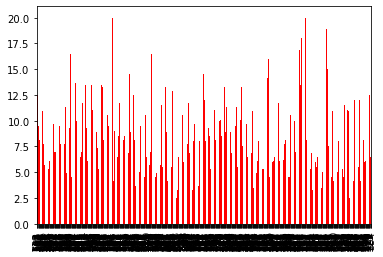

In [26]:
data_new['fare_amount'].plot.bar(color='Red')

CONVERTING STRING variables to NUMERIC

In [27]:
data_new.shape

(607, 9)

In [28]:
data_new=data_new.drop(['Unnamed: 0'],axis=1)

In [29]:
data_new.head(100)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
119,2009-08-07 13:41:12.0000004,4.1,2009-08-07 13:41:12 UTC,-73.986970,40.733488,-73.980232,40.744102,1
538,2011-01-23 14:03:00.000000117,12.5,2011-01-23 14:03:00 UTC,-73.981953,40.774797,-73.976655,40.732483,1
668,2009-09-19 01:25:25.0000004,17.7,2009-09-19 01:25:25 UTC,-73.993652,40.720863,-73.925577,40.702701,1
594,2015-06-09 09:49:17.0000003,9.5,2015-06-09 09:49:17 UTC,-74.008255,40.730507,-73.986359,40.743156,1
242,2014-11-03 21:05:00.000000145,7.5,2014-11-03 21:05:00 UTC,-73.993640,40.728117,-73.978397,40.745327,1
222,2011-03-07 14:15:33.0000007,8.1,2011-03-07 14:15:33 UTC,-73.998156,40.760995,-73.975220,40.765186,1
496,2014-08-17 04:03:00.00000039,19.5,2014-08-17 04:03:00 UTC,-73.988380,40.721727,-73.930358,40.760010,1
42,2009-04-15 09:23:43.0000002,19.3,2009-04-15 09:23:43 UTC,-73.955008,40.777250,-73.926960,40.865128,1
794,2010-03-18 20:22:00.000000296,8.5,2010-03-18 20:22:00 UTC,-73.985127,40.760353,-73.955230,40.782872,1
699,2009-05-10 15:20:23.0000005,2.9,2009-05-10 15:20:23 UTC,-73.982487,40.767151,-73.979905,40.765088,1


In [30]:
#Checking whether "passenger_count" is other than 1
count1=0
count2=0
for i in range(0,data_new.shape[0]):
    if data_new.iloc[i,7]==2:
        count2=count2+1
    else:
        count1=count1+1
print("Count2:",count2,"Count1:",count1)

Count2: 0 Count1: 607


In [31]:
#data_new=data_new.drop(['Unnamed: 0','key'],axis=1)

In [32]:
data_new.head().reset_index()

,index,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,119,2009-08-07 13:41:12.0000004,4.1,2009-08-07 13:41:12 UTC,-73.986970,40.733488,-73.980232,40.744102,1
1,538,2011-01-23 14:03:00.000000117,12.5,2011-01-23 14:03:00 UTC,-73.981953,40.774797,-73.976655,40.732483,1
2,668,2009-09-19 01:25:25.0000004,17.7,2009-09-19 01:25:25 UTC,-73.993652,40.720863,-73.925577,40.702701,1
3,594,2015-06-09 09:49:17.0000003,9.5,2015-06-09 09:49:17 UTC,-74.008255,40.730507,-73.986359,40.743156,1
4,242,2014-11-03 21:05:00.000000145,7.5,2014-11-03 21:05:00 UTC,-73.993640,40.728117,-73.978397,40.745327,1


In [33]:
data_new.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [34]:
data_new.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.0
mean,8.846293,-72.517320,39.946114,-72.637897,40.013603,1.0
std,3.971958,10.307011,5.677640,9.876329,5.440558,0.0
min,2.500000,-74.017159,0.000000,-74.016869,0.000000,1.0
25%,6.000000,-73.991526,40.735444,-73.991275,40.736288,1.0
50%,8.000000,-73.981782,40.752777,-73.980179,40.752324,1.0
75%,11.300000,-73.968428,40.765605,-73.967578,40.765358,1.0
max,20.100000,0.000000,40.810791,0.000000,40.865128,1.0


In [35]:
#Since PICKUP_DATETIME is an object, therefore FIXING IT....

In [36]:
data_new['pickup_datetime']=pd.to_datetime(data_new['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

In [37]:
#separating PICKUP_DATETIME into separate variables...FEATURE ENGINEERING

In [38]:
data_new['Year']=data_new['pickup_datetime'].dt.year
data_new['Month']=data_new['pickup_datetime'].dt.month
data_new['Date']=data_new['pickup_datetime'].dt.day
data_new['Day']=data_new['pickup_datetime'].dt.dayofweek
data_new['Hour']=data_new['pickup_datetime'].dt.hour
data_new['Minute']=data_new['pickup_datetime'].dt.minute


In [39]:
data_new.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
119,2009-08-07 13:41:12.0000004,4.1,2009-08-07 13:41:12,-73.986970,40.733488,-73.980232,40.744102,1,2009,8,7,4,13,41
538,2011-01-23 14:03:00.000000117,12.5,2011-01-23 14:03:00,-73.981953,40.774797,-73.976655,40.732483,1,2011,1,23,6,14,3
668,2009-09-19 01:25:25.0000004,17.7,2009-09-19 01:25:25,-73.993652,40.720863,-73.925577,40.702701,1,2009,9,19,5,1,25
594,2015-06-09 09:49:17.0000003,9.5,2015-06-09 09:49:17,-74.008255,40.730507,-73.986359,40.743156,1,2015,6,9,1,9,49
242,2014-11-03 21:05:00.000000145,7.5,2014-11-03 21:05:00,-73.993640,40.728117,-73.978397,40.745327,1,2014,11,3,0,21,5


In [40]:
data_new['passenger_count'].isnull().sum()
data_new['passenger_count'].unique()

array([1], dtype=int64)

In [41]:
data_new['fare_amount'].describe()

count    607.000000
mean       8.846293
std        3.971958
min        2.500000
25%        6.000000
50%        8.000000
75%       11.300000
max       20.100000
Name: fare_amount, dtype: float64

In [42]:
#Working on Latitiude and longitudes

In [44]:
data_new=data_new.drop(['key','pickup_datetime'],axis=1)



In [45]:
data_new.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute
119,4.1,-73.986970,40.733488,-73.980232,40.744102,1,2009,8,7,4,13,41
538,12.5,-73.981953,40.774797,-73.976655,40.732483,1,2011,1,23,6,14,3
668,17.7,-73.993652,40.720863,-73.925577,40.702701,1,2009,9,19,5,1,25
594,9.5,-74.008255,40.730507,-73.986359,40.743156,1,2015,6,9,1,9,49
242,7.5,-73.993640,40.728117,-73.978397,40.745327,1,2014,11,3,0,21,5


In [46]:
data_new[data_new['pickup_latitude']<-90]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [47]:
data_new[data_new['dropoff_longitude']<-180]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Day,Hour,Minute


In [48]:
data_new.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [49]:
#Calculating distance from latitudes and longitudes

In [50]:
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [51]:

data_new['distance(in kms)'] = data_new[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [53]:
data_new=data_new.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [54]:
data_new=data_new.drop(data_new[data_new['distance(in kms)']==0].index,axis=0)

In [55]:
data_new[data_new['distance(in kms)']==0]

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,Minute,distance(in kms)


In [56]:
data_new['distance(in kms)'].describe()

count     593.000000
mean       17.154332
std       355.781100
min         0.001011
25%         1.230672
50%         2.019262
75%         3.326523
max      8666.253254
Name: distance(in kms), dtype: float64

In [57]:
#Removing outlier
data_new=data_new.drop(data_new[data_new['distance(in kms)']>8000].index,axis=0)

In [58]:
data_new.dtypes

fare_amount         float64
passenger_count       int64
Year                  int64
Month                 int64
Date                  int64
Day                   int64
Hour                  int64
Minute                int64
distance(in kms)    float64
dtype: object

DATA VISUALIZATION

In [59]:
data_new.columns

Index(['fare_amount', 'passenger_count', 'Year', 'Month', 'Date', 'Day',
       'Hour', 'Minute', 'distance(in kms)'],
      dtype='object')

1. countplot for passenger count

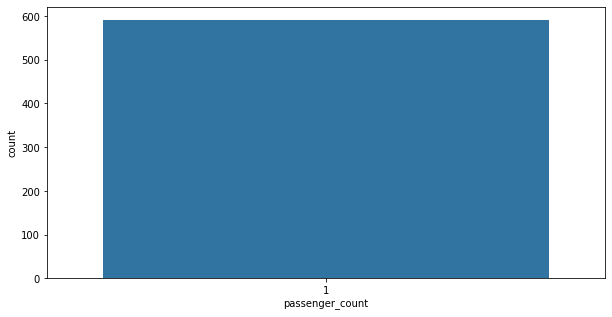

In [60]:
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count",data=data_new)

2. Countplot for Time durations

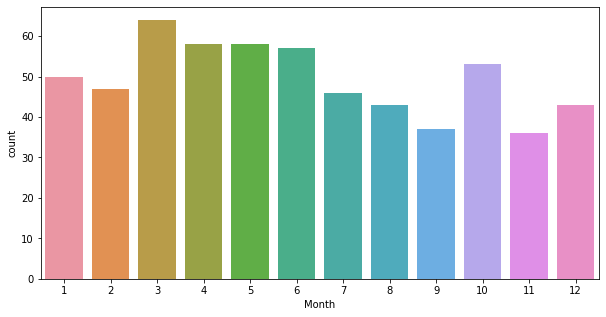

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x="Month",data=data_new)


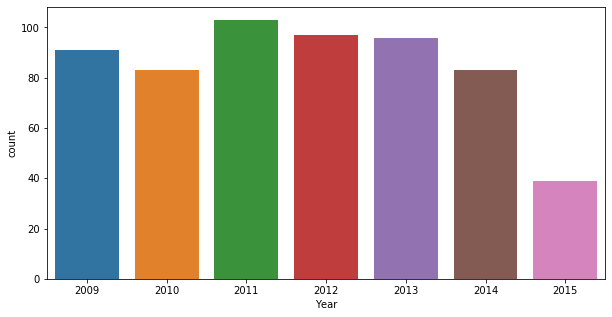

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(x="Year",data=data_new)

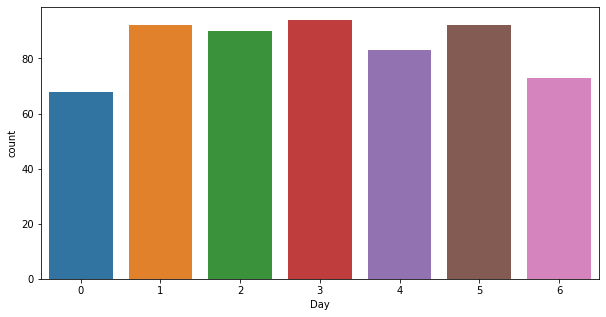

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day",data=data_new)

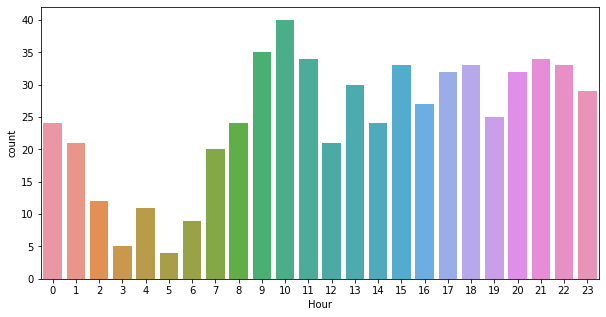

In [64]:
plt.figure(figsize=(10,5))
sns.countplot(x="Hour",data=data_new)

3. Relationship bw passengers and fare

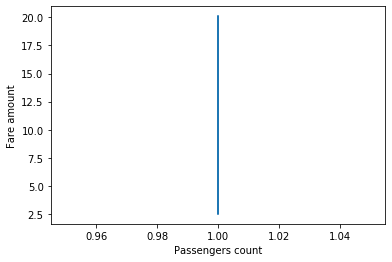

In [65]:
plt.xlabel("Passengers count")
plt.ylabel("Fare amount")
plt.plot("passenger_count","fare_amount",data=data_new)

4. Relationship bw Pickup data+time and fare amount

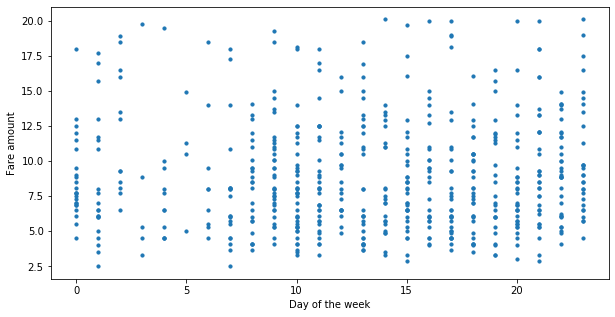

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(x=data_new['Hour'], y=data_new['fare_amount'] ,s=10)
plt.xlabel("Day of the week")
plt.ylabel("Fare amount")
plt.show()

5. Relationship between distance and the fare

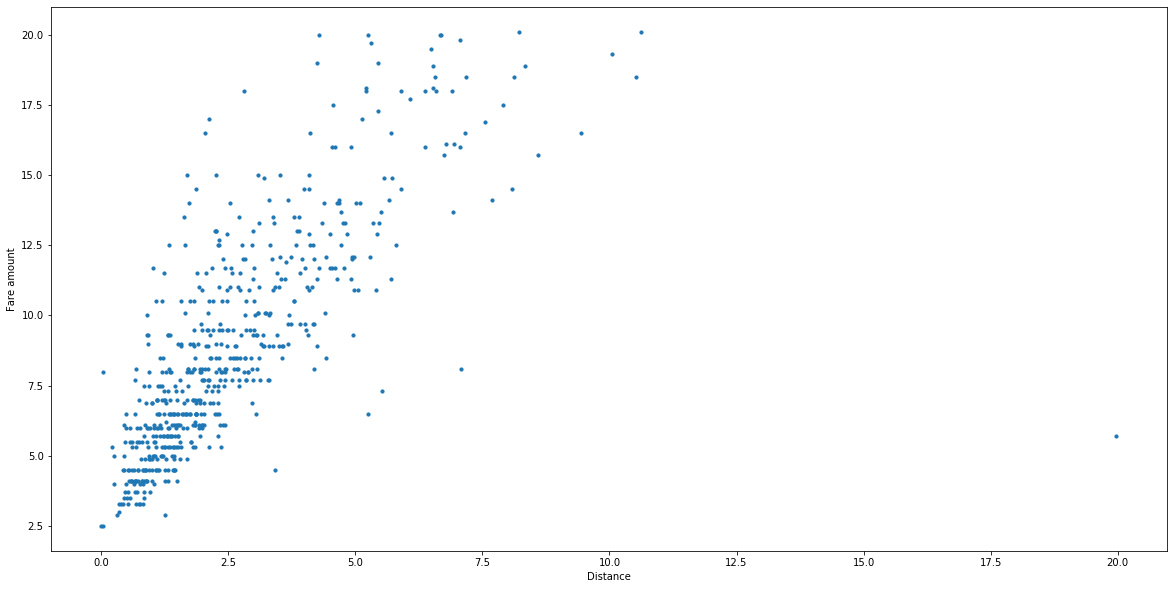

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(x=data_new['distance(in kms)'], y=data_new['fare_amount'] ,s=10)
plt.xlabel("Distance")
plt.ylabel("Fare amount")
plt.show()

FEATURE SCALING

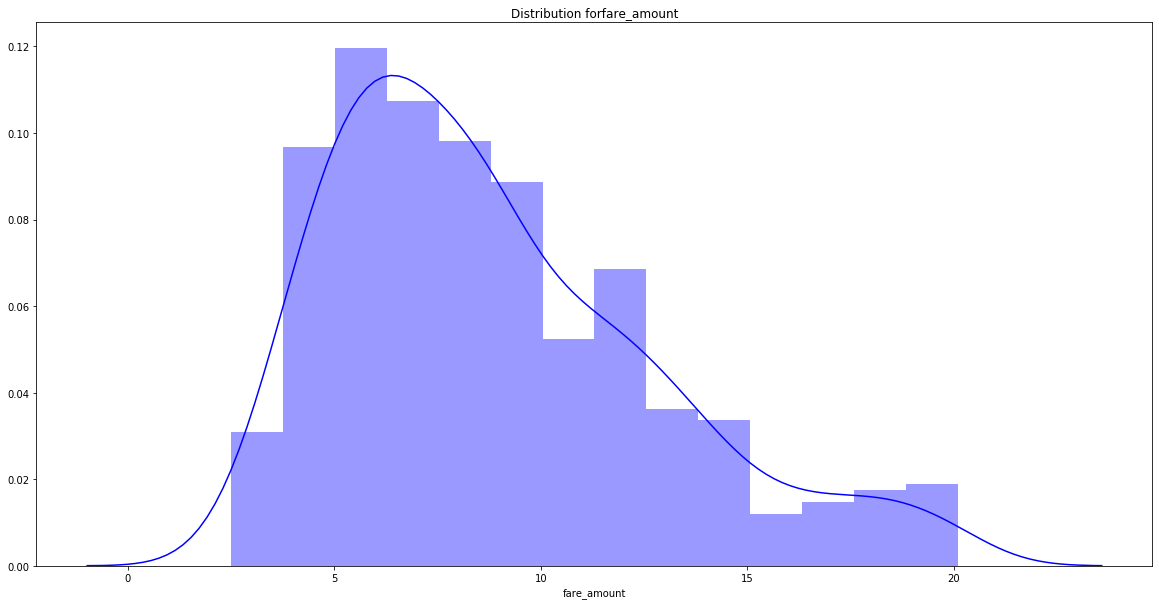

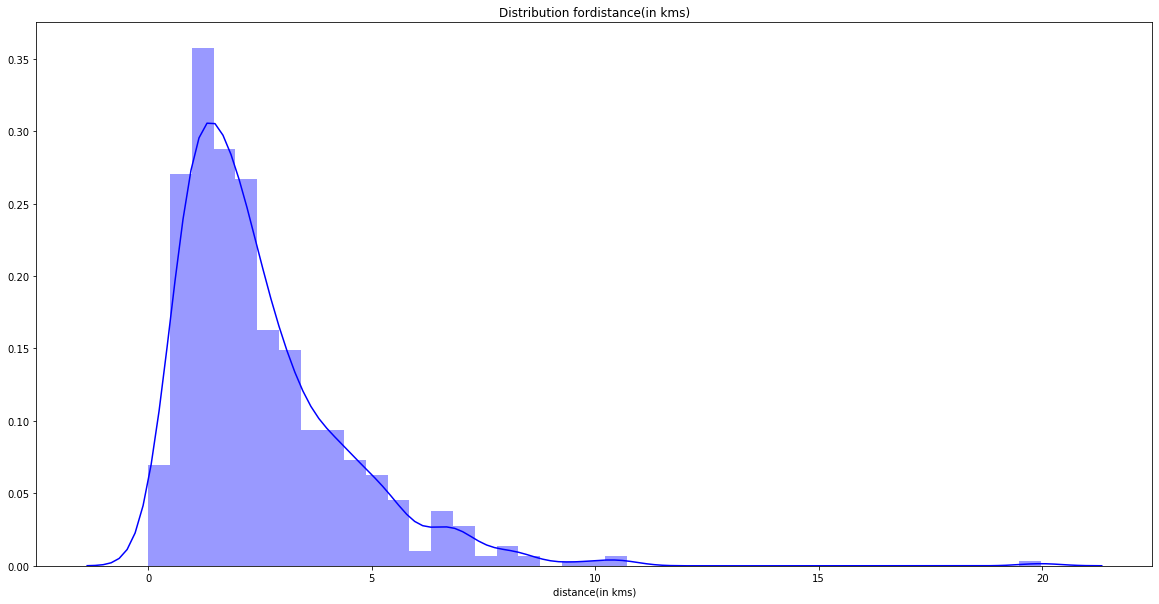

In [68]:
for i in ["fare_amount","distance(in kms)"]:
    plt.figure(figsize=(20,10))
    sns.distplot(data_new[i],bins="auto",color="blue")
    plt.title("Distribution for"+i)
    plt.show()

In [69]:
#Since distance seems to be postively skewed, we need to run log-transform over it

In [70]:
data_new['distance(in kms)']=np.log1p(data_new['distance(in kms)'])

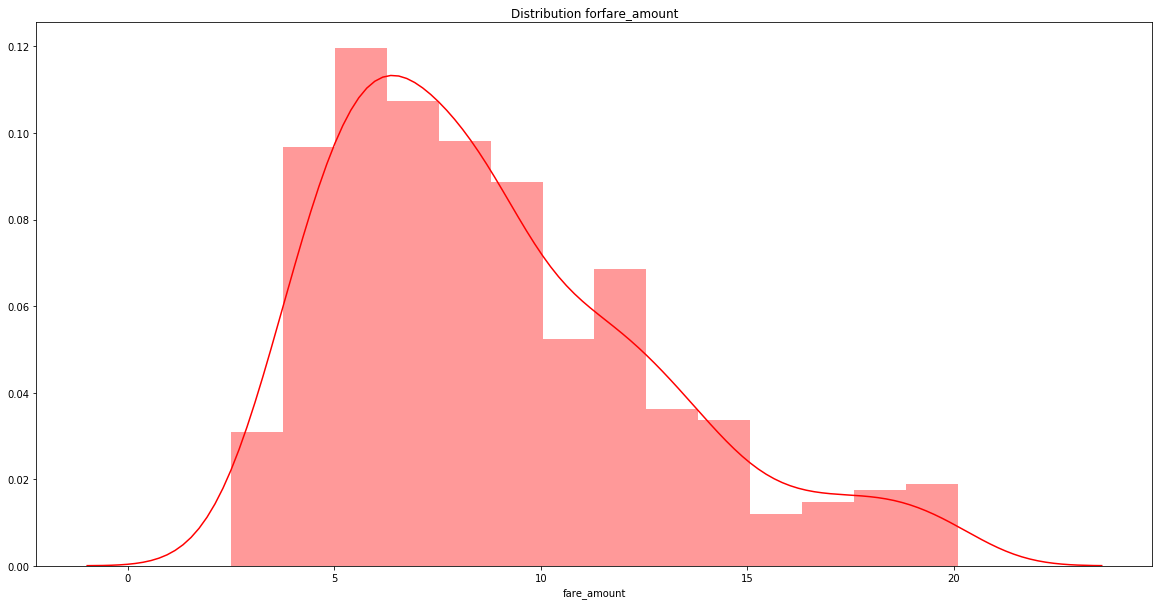

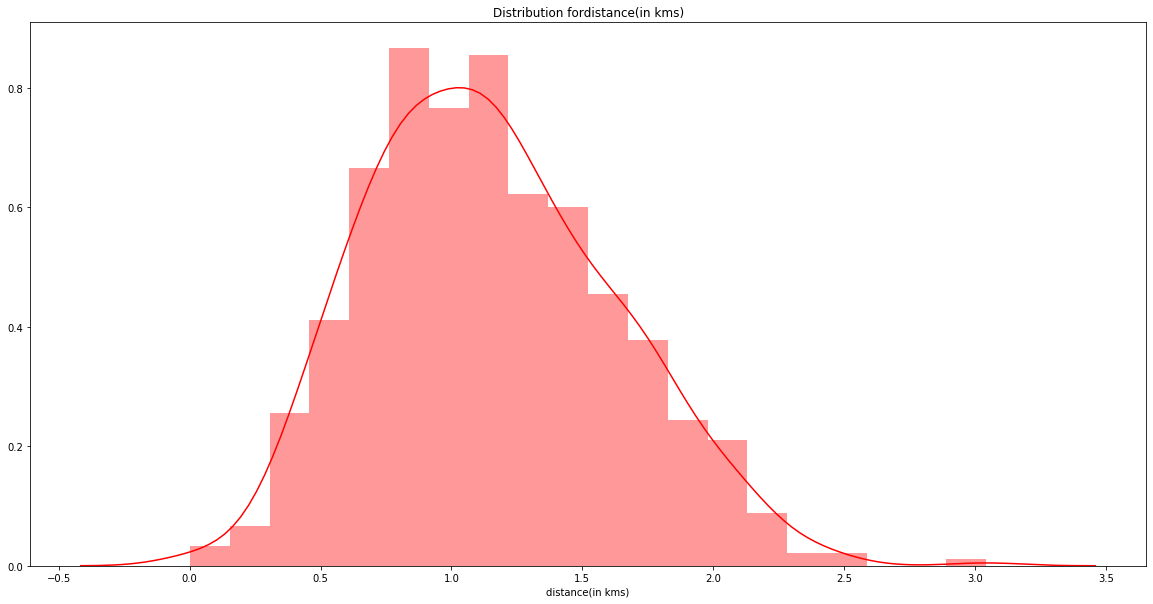

In [71]:
for i in ["fare_amount","distance(in kms)"]:
    plt.figure(figsize=(20,10))
    sns.distplot(data_new[i],bins="auto",color="red")
    plt.title("Distribution for"+i)
    plt.show()

In [72]:
data_new.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,Minute,distance(in kms)
119,4.1,1,2009,8,7,4,13,41,0.837098
538,12.5,1,2011,1,23,6,14,3,1.745055
668,17.7,1,2009,9,19,5,1,25,1.957667
594,9.5,1,2015,6,9,1,9,49,1.199934
242,7.5,1,2014,11,3,0,21,5,1.195337


APPLYING ML ALGORITHMS:

We will be using: Decision tree,Random forest,Statistical modelling(Linear),KNN and Naive Bayes

In [73]:
data_new.shape

(592, 9)

In [74]:
data_new.columns


Index(['fare_amount', 'passenger_count', 'Year', 'Month', 'Date', 'Day',
       'Hour', 'Minute', 'distance(in kms)'],
      dtype='object')

In [75]:
label=data_new['fare_amount']
features=[c for c in data_new.columns if c not in ['fare_amount']]
X_train,X_test,Y_train,Y_test=train_test_split(data_new[features],label,test_size=0.4,random_state=7)

In [76]:
X_train.shape

(355, 8)

In [77]:
X_test.shape

(237, 8)

In [78]:
Y_train.shape

(355,)

In [79]:
Y_test.shape

(237,)

1. DECISION TREE:

In [80]:
from sklearn.tree import DecisionTreeRegressor

In [81]:
model=DecisionTreeRegressor(max_depth=2).fit(X_train,Y_train)

In [82]:
model

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [83]:
#Prediction part

In [84]:
pred=model.predict(X_test)
pred_train=model.predict(X_train)

In [85]:
#Error Metrics(RMSE):

In [86]:
rmse_train=np.sqrt(mean_squared_error(Y_train,pred_train))
rmse_train

2.3229176135366925

In [87]:
rmse_test=np.sqrt(mean_squared_error(Y_test,pred))
rmse_test

2.414037866588831

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score_train=r2_score(Y_train,pred_train)
r2_score_train

0.6374961235823049

In [90]:
r2_score_test=r2_score(Y_test,pred)
r2_score_test

0.6435340543019183

2. RANDOM FOREST

In [91]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
model2=RandomForestRegressor(n_estimators=500).fit(X_train,Y_train)

In [93]:
model2

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [94]:
#Prediction

In [95]:
pred2_train=model2.predict(X_train)
pred2_test=model2.predict(X_test)

In [96]:
#Error Metrics

In [97]:
rmse2_train=np.sqrt(mean_squared_error(Y_train,pred2_train))
rmse2_train

0.8309022611968063

In [98]:
rmse2_test=np.sqrt(mean_squared_error(Y_test,pred2_test))
rmse2_test

2.185284229579903

In [99]:
r2_score_train2=r2_score(Y_train,pred2_train)
r2_score_train2

0.9536184858127631

In [100]:
r2_score_test2=r2_score(Y_test,pred2_test)
r2_score_test2

0.7078904514248217

3. Linear Regression

In [101]:
import statsmodels.api as sm

In [102]:
model3=sm.OLS(Y_train,X_train).fit()

In [103]:
#predict

In [104]:
pred3_train=model3.predict(X_train)
pred3_test=model3.predict(X_test)

In [105]:
#Error metrics

In [106]:
rmse3_train=np.sqrt(mean_squared_error(Y_train,pred3_train))
rmse3_train

2.2446433739543568

In [107]:
rmse3_test=np.sqrt(mean_squared_error(Y_test,pred3_test))
rmse3_test

2.173891257462479

In [108]:
r2_score_train3=r2_score(Y_train,pred3_train)
r2_score_train

0.6374961235823049

In [109]:
r2_score_test3=r2_score(Y_test,pred3_test)
r2_score_test3

0.7109283360617862

4. KNN

In [110]:
from sklearn.neighbors import KNeighborsRegressor

In [111]:
model4=KNeighborsRegressor(n_neighbors=11).fit(X_train,Y_train)

In [112]:
model4

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [113]:
#Prediction

In [114]:
pred4_train=model4.predict(X_train)
pred4_test=model4.predict(X_test)

In [115]:
#Error Metrics

In [116]:
rmse4_train=np.sqrt(mean_squared_error(Y_train,pred4_train))
rmse4_train

3.6712001617183403

In [117]:
rmse4_test=np.sqrt(mean_squared_error(Y_test,pred4_test))
rmse4_test

4.040072835165578

In [118]:
r2_score_train4=r2_score(Y_train,pred4_train)
r2_score_train4

0.09455688937301843

In [119]:
r2_score_test4=r2_score(Y_test,pred4_test)
r2_score_test4

0.0015914768898626086

APPLYING BOOSTING TECHNIQUES:
1. Gradient Boosting


In [120]:
from sklearn.ensemble import GradientBoostingRegressor


In [121]:
GB_model=GradientBoostingRegressor().fit(X_train,Y_train)

In [122]:
GB_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [123]:
pred5_train=GB_model.predict(X_train)
pred5_test=GB_model.predict(X_test)

In [124]:
rmse5_train=np.sqrt(mean_squared_error(Y_train,pred5_train))
rmse5_train

1.1523003183047091

In [125]:
rmse5_test=np.sqrt(mean_squared_error(Y_test,pred5_test))
rmse5_test

2.308644468564285

2. XGBOOST

In [132]:
from xgboost import XGBRegressor

In [134]:
model_XG=XGBRegressor().fit(X_train,Y_train)

In [135]:
model_XG

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [137]:
predXGB_train=model_XG.predict(X_train)
predXGB_test=model_XG.predict(X_test)

In [138]:
rmseXGB_train=np.sqrt(mean_squared_error(Y_train,predXGB_train))
rmseXGB_train

0.008639096246025244

In [141]:
rmseXGB_test=np.sqrt(mean_squared_error(Y_test,predXGB_test))
rmseXGB_test

2.42176989228414

3. XGBOOST with Hyperparameter optimization using RandomizedSearchCV

In [142]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [148]:
Y_train.head()

667     5.3
419     4.5
215    14.1
482     8.9
746     8.9
Name: fare_amount, dtype: float64

In [158]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,7,8,9,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4,0.5],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
    
}

In [159]:
random_search=RandomizedSearchCV(XGBRegressor(),param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3).fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.8s finished


In [161]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.15,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [162]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=4,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [164]:
model_XG1=XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=4,
             min_child_weight=3,monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None).fit(X_train,Y_train)

In [165]:
model_XG1

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.15, max_delta_step=0, max_depth=4,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

In [166]:
predXGB1_train=model_XG1.predict(X_train)
predXGB1_test=model_XG1.predict(X_test)

In [167]:
rmseXGB1_train=np.sqrt(mean_squared_error(Y_train,predXGB1_train))
rmseXGB1_train

0.6697517184819077

In [170]:
rmseXGB1_test=np.sqrt(mean_squared_error(Y_test,predXGB1_test))
rmseXGB1_test

2.3415084793018828

In [171]:
data_new.head()

,fare_amount,passenger_count,Year,Month,Date,Day,Hour,Minute,distance(in kms)
119,4.1,1,2009,8,7,4,13,41,0.837098
538,12.5,1,2011,1,23,6,14,3,1.745055
668,17.7,1,2009,9,19,5,1,25,1.957667
594,9.5,1,2015,6,9,1,9,49,1.199934
242,7.5,1,2014,11,3,0,21,5,1.195337


FINAL STEP: Predicting Cab fare from the test dataset

In [172]:
real_test=pd.read_csv(r"C:/Users/.hp/Desktop/EdWisor/Datasets/CFPtest.csv",sep=",")

In [174]:
predXGB1_test=model_XG1.predict(X_test)

In [175]:
X_test['Fare_Amount']=predXGB_test

In [176]:
X_test.head()

,passenger_count,Year,Month,Date,Day,Hour,Minute,distance(in kms),Fare_Amount
532,1,2011,6,18,5,21,20,1.143842,6.995225
326,1,2011,10,7,4,7,10,0.882670,5.786912
437,1,2010,2,12,4,11,34,0.521478,3.988924
779,1,2013,11,21,3,10,48,1.377033,11.515099
729,1,2012,2,10,4,6,28,1.103126,6.450745


In [179]:
X_test.to_csv('C:/Users/.hp/Desktop/EdWisor/Datasets/Final_CFP1.csv', index=False)